importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import re 

C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Installing the Apyori library to perform Apriori algorithm

In [2]:
!pip install apyori

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from apyori import apriori

Importing the dataset 

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/refs/heads/master/Groceries_dataset.csv')

Data Analysis 

In [5]:
#show the top 5 datapoint of DataFrame 
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [6]:
##check information of each column -> dtype, Non-Null Count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [7]:
#Find the no. of rows and no. of columns in DataFrame
df.shape

(38765, 3)

In [8]:
#find the total number element in DataFrame
df.size

116295

In [9]:
#dimension of Dataframe
df.ndim

2

In [10]:
#Checking the null value in each column of DataFrame 
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [11]:
#Q1. Which of the items are the top 10 selling item?
df.itemDescription.value_counts().head(10)

itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64

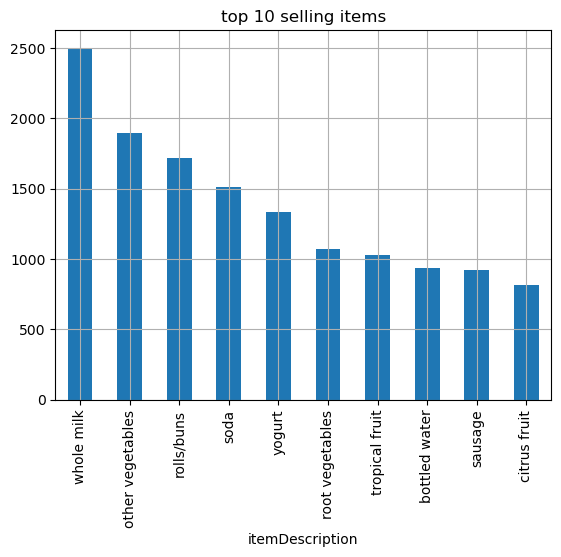

In [12]:
#Show the items are the top 10 selling item using plot ?
df.itemDescription.value_counts().head(10).plot(kind='bar')
plt.title('top 10 selling items')
plt.grid()

In [13]:
#Q2. Which of the item is the least 10 selling item?
df.itemDescription.value_counts().tail(10).sort_values()

itemDescription
kitchen utensil          1
preservation products    1
baby cosmetics           3
bags                     4
make up remover          5
toilet cleaner           5
frozen chicken           5
rubbing alcohol          5
salad dressing           6
whisky                   8
Name: count, dtype: int64

<Axes: xlabel='itemDescription'>

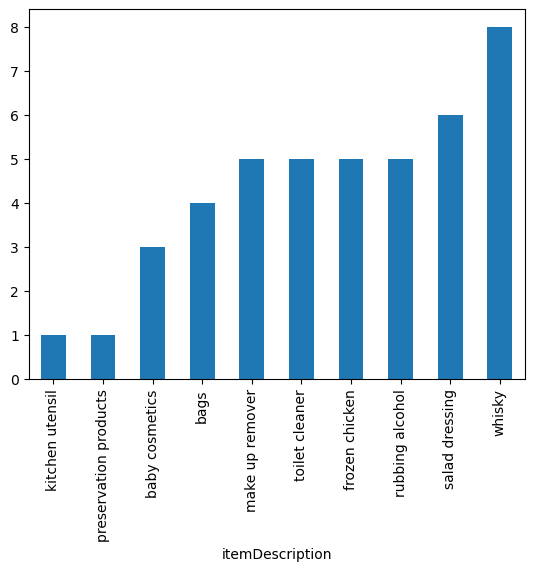

In [14]:
#show the item is the least 10 selling item using plot?
df.itemDescription.value_counts().tail(10).sort_values().plot(kind='bar')

In [15]:
#Q3: Top 10 customers frequently bought the products
df.Member_number.value_counts().head(10)

Member_number
3180    36
3737    33
3050    33
2051    33
2625    31
3915    31
2433    31
2271    31
3872    30
3289    29
Name: count, dtype: int64

<Axes: xlabel='Member_number'>

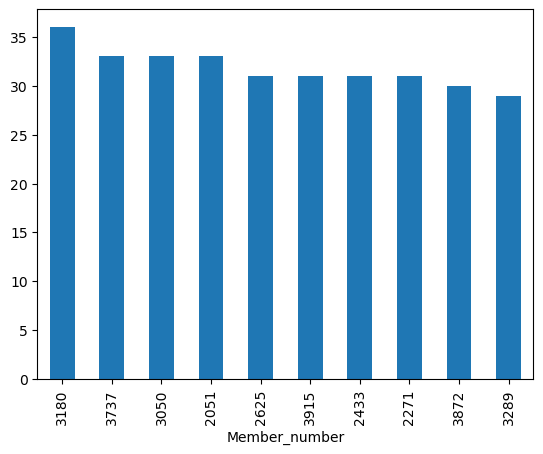

In [16]:
#Q3: Top 10 customers frequently bought the products using plot 
df.Member_number.value_counts().head(10).plot(kind='bar')

In [17]:
#Create a new column year in DataFrame 
df['year']=pd.DatetimeIndex(df.Date).year

In [18]:
#find out in which year majority of transaction happened ?
df.year.value_counts()

year
2015    20488
2014    18277
Name: count, dtype: int64

In [19]:
#Create a new column day,month in DataFrame 
df['day']=pd.DatetimeIndex(df.Date).day
df['month']=pd.DatetimeIndex(df.Date).month

In [20]:
#find out in which month majority of transaction happened ?
df.month.value_counts()

month
8     3498
5     3335
1     3333
6     3316
3     3283
11    3273
7     3268
10    3218
4     3172
12    3074
2     3032
9     2963
Name: count, dtype: int64

In [21]:
#find out in which day majority of transaction happened ?
df.day.value_counts()

day
28    1375
21    1354
26    1351
8     1349
14    1341
13    1341
27    1327
4     1308
10    1308
11    1297
5     1290
24    1290
18    1285
7     1277
23    1277
22    1272
19    1272
9     1271
2     1252
1     1250
15    1245
3     1243
6     1232
25    1229
20    1214
30    1201
17    1181
12    1179
16    1158
29    1124
31     672
Name: count, dtype: int64

In [22]:
#show me in 2015 which month is having more transaction 
df[df['year']==2015]['month'].value_counts()

month
8     1963
1     1829
3     1792
6     1791
11    1777
5     1710
4     1666
10    1663
7     1645
9     1613
12    1554
2     1485
Name: count, dtype: int64

In [23]:
#show the top 5 datapoints of DataFrame 
df.head()

,Member_number,Date,itemDescription,year,day,month
0,1808,21-07-2015,tropical fruit,2015,21,7
1,2552,05-01-2015,whole milk,2015,1,5
2,2300,19-09-2015,pip fruit,2015,19,9
3,1187,12-12-2015,other vegetables,2015,12,12
4,3037,01-02-2015,whole milk,2015,2,1


In [26]:
#show me in 2015 which Date is having more transaction where month is 8
df[(df['year']==2015)& (df['month']==8)][['day','month','year']].value_counts()

day  month  year
8    8      2015    92
21   8      2015    83
20   8      2015    83
18   8      2015    82
15   8      2015    82
28   8      2015    79
7    8      2015    75
13   8      2015    74
12   8      2015    73
5    8      2015    69
9    8      2015    69
24   8      2015    68
6    8      2015    66
11   8      2015    65
4    8      2015    64
23   8      2015    61
27   8      2015    61
19   8      2015    60
3    8      2015    59
17   8      2015    57
30   8      2015    55
26   8      2015    54
14   8      2015    54
22   8      2015    53
25   8      2015    52
2    8      2015    47
31   8      2015    47
16   8      2015    46
10   8      2015    45
1    8      2015    45
29   8      2015    43
Name: count, dtype: int64

### data cleaning for Apriori Implementation

In [52]:
#show the top 2 datapoint of DataFrame 
df.head(2)

,Member_number,Date,itemDescription,year,day,month
0,1808,21-07-2015,tropical fruit,2015,21,7
1,2552,05-01-2015,whole milk,2015,1,5


In [66]:
#copy the DataFrame
data=df.copy()
data1=data.copy()

In [67]:
#onehotEncoder to convert categorical data into  numeric or boolean form
data=pd.get_dummies(data['itemDescription'])

In [68]:
#show the top 5 datapoint of DataFrame 
data.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [69]:
#Drop the itemDescription from the DataFrame 'data1'
data1.drop('itemDescription',axis=1,inplace=True)

In [70]:
#Join two dataframe 'data1' and 'data' 
data1=data1.join(data)

In [77]:
#show the top 2 datapoint of DataFrame 
data1.head(2)

,Member_number,Date,year,day,month,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,2015,21,7,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2552,05-01-2015,2015,1,5,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [72]:
#create the list of unique product from DataFrame 
products=df['itemDescription'].unique()

In [73]:
#Show all product 
products

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [74]:
# particular member buy which date and product 
data2=data1.groupby(['Member_number',"Date"])[products[:]].sum()

In [75]:
#Reset the Index of DataFrame 'data2'
data2=data2.reset_index()[products]

In [76]:
#show the top 5 datapoint of DataFrame 
data2.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
#Create the function to replace all 1's with respective column name 
def func(data):
    for i in products:
        if data[i]>0:
            data[i]=i
    return data
        

In [84]:
#apply the function in DataFrame 'data2'
data2=data2.apply(func,axis=1)

C:\Users\asus\AppData\Local\Temp\ipykernel_18632\2884344509.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'whole milk' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[i]=i
C:\Users\asus\AppData\Local\Temp\ipykernel_18632\2884344509.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'canned beer' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[i]=i
C:\Users\asus\AppData\Local\Temp\ipykernel_18632\2884344509.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'sausage' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[i]=i
C:\Users\asus\AppData\Local\Temp\ipykernel_18632\2884344509.py:4: FutureWarning: Set

C:\Users\asus\AppData\Local\Temp\ipykernel_18632\2884344509.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'processed cheese' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[i]=i
C:\Users\asus\AppData\Local\Temp\ipykernel_18632\2884344509.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'onions' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[i]=i
C:\Users\asus\AppData\Local\Temp\ipykernel_18632\2884344509.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'cream cheese ' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[i]=i
C:\Users\asus\AppData\Local\Temp\ipykernel_18632\2884344509.py:4: FutureWarni

C:\Users\asus\AppData\Local\Temp\ipykernel_18632\2884344509.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'jam' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[i]=i
C:\Users\asus\AppData\Local\Temp\ipykernel_18632\2884344509.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Instant food products' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[i]=i
C:\Users\asus\AppData\Local\Temp\ipykernel_18632\2884344509.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'pet care' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[i]=i
C:\Users\asus\AppData\Local\Temp\ipykernel_18632\2884344509.py:4: FutureWarning:

In [85]:
#show the top 5 datapoint of DataFrame 
data2.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
#store only value of DataFrame in list 
newdata=data2.values

In [88]:
#remove all 0's from list 
newdata=[i[i!=0].tolist() for i in newdata if i[i!=0].tolist()]

In [90]:
#show 10 value from the list 
newdata[:10]

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

Apriori Implementation

In [93]:
association=apriori(newdata,
                    min_support=0.0003,
                    min_confidence=0.05,
                    min_lift=3,
                    max_length=2)
result=list(association)

In [101]:
result[0]

RelationRecord(items=frozenset({'liver loaf', 'fruit/vegetable juice'}), support=0.00040098910646260775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)])

In [102]:
for i in result[0]:
    print(i)

frozenset({'liver loaf', 'fruit/vegetable juice'})
0.00040098910646260775
[OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)]


In [ ]:
#liver loaf ->fruit/vegetable juice

In [104]:
result[0][0]

frozenset({'fruit/vegetable juice', 'liver loaf'})